## HW-3 • Math 189 • Wi 2024
### Due Date: Sat, Mar 16th 2024

> NAME: $\color{red}{\text{    Phu Dang     }}$
> 
> PID: $\color{red}{\text{    A16913100     }}$
>
> 

---

## Instructions
* Submit your solutions online on Gradescope
* Look at the detailed instructions [here](https://ucsd-math189-wi24.github.io/syllabus.html#assignments)


I certify that the following write-up is my own work, and have abided by the UCSD Academic Integrity Guidelines.

- [x] Yes
- [ ] No

---

In [37]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

## Configurations
%matplotlib inline

# Question 1

> ##### Linear regression

The `data` folder contains the `housing.csv` dataset which contains housing prices in California from the 1990 California census. The objective is to predict the median house price for California districts based on various features. The features are the following:

1. `longitude`: A measure of how far west a house is; a higher value is farther west
2. `latitude`: A measure of how far north a house is; a higher value is farther north
3. `housing_median_age`: Median age of a house within a block; a lower number is a newer building
4. `total_rooms`: Total number of rooms within a block
5. `total_bedrooms`: Total number of bedrooms within a block
6. `population`: Total number of people residing within a block
7. `households`: Total number of households, a group of people residing within a home unit, for a block
8. `median_income`: Median income for households within a block of houses
9. `median_house_value`: Median house value for households within a block
10. `ocean_proximity`: Location of the house w.r.t ocean/sea


> a. Load the dataset and display the first 5 rows of the dataset.

In [38]:
path = "C:/Users/phuro/UCSD/MATH189/MATH189/homeworks/data/housing.csv"
df = pd.read_csv(path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


> b. Describe the data type (e.g., categorical, discrete quantitative, etc.) of each variable in the dataset. If you identify any categorical variables, explicitly convert them to categorical variables in your pandas dataframe.

In [39]:
possible_types = ['categorical', 'ordinal', 'discrete quantitative', 'continuous quantitative']

**Answer**: 
- longitude: **continuous quantitative**
- latitude: **continuous quantitative**
- housing_median_age: **discrete quantitative**
- total_rooms: **discrete quantitative**
- total_bedrooms: **discrete quantitative**
- population: **discrete quantitative**
- households: **discrete quantitative**
- median_income: **continuous quantitative**
- median_house_value: **continuous quantitative**
- ocean_proximity: **categorical**

**Clarification**: many of the discrete quantitative variables above also make sense to be continuous quantitive, such as how 0.5 can be considered half a year. However, I chose discrete because all of the data points are integers.

In [40]:
df = df.dropna()

In [41]:
df['households'] = df['households'].astype(int)
df['population'] = df['population'].astype(int)
df['total_bedrooms'] = [int(_) if not np.isnan(_) else _ for _ in df['total_bedrooms']]
df['total_rooms'] = df['total_rooms'].astype(int)
df['housing_median_age'] = df['housing_median_age'].astype(int)

In [42]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129,322,126,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200.0,NEAR BAY


> c. Fit a linear regression model to predict the `median_house_value` based on all other covariates. 

In [43]:
# oceanProxMap = {
#     'ISLAND': 0,
#     'NEAR OCEAN': 1,
#     'NEAR BAY': 2, 
#     '<1H OCEAN': 3, 
#     'INLAND': 4,  
#     }

df['ocean_proximity'] = df['ocean_proximity'].astype('category')

In [44]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129,322,126,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500.0,NEAR BAY


In [45]:
'median_house_value ~ ' + ' + '.join(df.columns.difference(['median_house_value']))

'median_house_value ~ households + housing_median_age + latitude + longitude + median_income + ocean_proximity + population + total_bedrooms + total_rooms'

In [46]:
formula = 'median_house_value ~ ' + ' + '.join(df.columns.difference(['median_house_value']))
print(formula)
full_model = smf.ols(formula, data=df).fit()
print(full_model.summary())

median_house_value ~ households + housing_median_age + latitude + longitude + median_income + ocean_proximity + population + total_bedrooms + total_rooms
                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3112.
Date:                Fri, 15 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:08:25   Log-Likelihood:            -2.5655e+05
No. Observations:               20433   AIC:                         5.131e+05
Df Residuals:                   20420   BIC:                         5.132e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err     

> d. Based on the summary of the linear regression model, do you think this is a good fit for the data? Explain your answer.

**Answer**: With a R-squared value of 0.64, meaning 64% of the variance in the target variable explained by the input data, the features decently capture / account for the variability in the median house value. However, with an extremely high condition number, 7.24e+05, the model seems to exhibit a strong degree of multicollinearity among the features. In the context of best practices predictive analyses, the model is not a good fit for the data.

> e. Comment on the model assumptions and to what extent they are satisfied or not satisfied.

<AxesSubplot:xlabel='longitude', ylabel='median_house_value'>

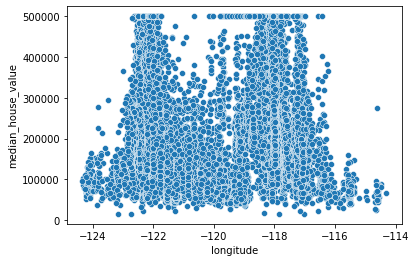

In [47]:
sns.scatterplot(x=df['longitude'], y=df['median_house_value'])

**Answer**: One critical assumption behind linear regression models is linearity among features against the target variable. By intution, one may presume that longitude and latitude may not realistically have a linear relationship with median house value, which is confirmed by the visualization above, where longitude does not have a linear relationship with median house value. Hence, the model assumptions are not satisfied.

> f. Compute the variance inflation factor (VIF) for each covariate. What do you observe?

In [48]:
exog = full_model.model.exog
feat = full_model.params.index 
for i in range(1, exog.shape[1]):
    print(f"VIF: {feat[i]}: {variance_inflation_factor(exog, i)}")

VIF: ocean_proximity[T.INLAND]: 2.8597988166637696
VIF: ocean_proximity[T.ISLAND]: 1.0022025466355962
VIF: ocean_proximity[T.NEAR BAY]: 1.5670986217391483
VIF: ocean_proximity[T.NEAR OCEAN]: 1.1967484675438809
VIF: households: 35.17337501008421
VIF: housing_median_age: 1.3236221972508975
VIF: latitude: 19.969175925581585
VIF: longitude: 18.090772087952747
VIF: median_income: 1.786366625322834
VIF: population: 6.446223241301073
VIF: total_bedrooms: 36.30988317301832
VIF: total_rooms: 12.966421703388841


**Answer**: There are numerous features with a quite high variance inflation factor. If we use a threshold of 10 as "no go", each of the variables "households", 'latitude", "longitude", "total_bedrooms", "total_rooms" has a variance inflation factor well above 10, this indicates a strong degree of multicollinearity with other variables. "Population" shows moderate correlatio at a VIF of 6.4. The rest of the features shows low degrees of multicollinearity with VIFs lower than 5. 

> g. Drop the covariate(s) with a variance inflation factor greater than 5 and fit the linear regression model again.

In [49]:
df1g = df.drop(columns=['households', 'latitude', 'longitude', 'population', \
    'total_bedrooms', 'total_rooms'])
df1g.head(2)

,housing_median_age,median_income,median_house_value,ocean_proximity
0,41,8.3252,452600.0,NEAR BAY
1,21,8.3014,358500.0,NEAR BAY


In [50]:
formula = 'median_house_value ~ ' + ' + '.join(
    df1g.columns.difference(['median_house_value'])
)
print(formula)
new_model = smf.ols(formula, data=df1g).fit()
print(new_model.summary())

median_house_value ~ housing_median_age + median_income + ocean_proximity
                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     5045.
Date:                Fri, 15 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:08:51   Log-Likelihood:            -2.5788e+05
No. Observations:               20433   AIC:                         5.158e+05
Df Residuals:                   20426   BIC:                         5.158e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

> h. Based on the summary of the regression model `new_model` interpret the coefficients of the covariates.

**Answer**: 

The "hold all other variables constant" assumption applies for all interpretations below.

- **Intercept (51410)**: The predicted median house value when all of the other features are zero, which is $51410, this also represents the bias of the model in its risk-minimization process.

- **ocean_proximity - inland (-71720)**: The predicted median home value decreases by approximately $71720 if the subject house is located inland.

- **ocean_proximity - island (184700)**: The predicted median home value increases by approximately $184700 if the subject house is located on an island.

- **ocean_proximity - near bay (13240)**: The predicted median home value increases by approximately $13240 if the subject house is located near bay.

- **ocean_proximity - near ocean (17320)**: The predicted median home value increases by approximately $17320 if the subject house is located near ocean.

- **housing_median_age (930.5)**: The predicted median home value increases by approximately $930.5 for each unit (year) increase in the median age of homes in the subject block.

- **median_income (38200)**: The predicted median home value increases by approximately $38200 for each unit increase in the median income in the subject block.

> i. Holding all other covariates constant, which of the `ocean_proximity` categories do you expect to find a house with the highest median house value? Why?

In [51]:
df.groupby('ocean_proximity')['median_house_value'].median()

ocean_proximity
<1H OCEAN     215000.0
INLAND        108700.0
ISLAND        414700.0
NEAR BAY      233800.0
NEAR OCEAN    228750.0
Name: median_house_value, dtype: float64

**Answer**: Holding all other variables constant, I expect the "island" category to possess a house with the highest median house value, assuming we are calculating "highest median value" relative to other houses within the subject house's block. This is because building, maintaining, and funding a house on an island can be very expensive. On islands: mails, utilities, and other services have to delivered in special ways; it also makes sense for there to be great additional costs for such high degrees of exclusivity and privacy, such as special fees, taxes, and miscellaneous costs associated with up-keeping an island property.

---

# Question 2

For this question, we are going to use the `abortion` dataset which consists of Abortion Opinions in the General Social Survey (GSS) from 1977 to 2018. The article related to the dataset can be found [here](https://gss.norc.org/Documents/reports/methodological-reports/MR133%20Abortion.pdf).

The data has been preprocessed and is available in the `data` folder as `abortion.csv`. The dataset contains the following columns:

1. `abortion`: Do you think that abortion should be legal for any reason?
2. `year`: Year of the survey
3. `age`: Respondent's age
4. `sex`: Respondent's sex
5. `race`: Respondent's race
6. `education`: How many years of education has the respondent completed
7. `relactiv`: Self-reported religiosity
8. `pid`: Respondent's political party identification (0: strong democrat ... 6: strong republican)


<br><br><br><br>

> a. Load the dataset and display the first 5 rows of the dataset.

In [52]:
path = "C:/Users/phuro/UCSD/MATH189/MATH189/homeworks/data/abortion.csv"
df = pd.read_csv(path)
df.head()

,year,age,race,sex,educ,relactiv,pid,abortion
0,2006,50.0,Black,Female,13.0,4.0,0.0,1.0
1,2006,50.0,Black,Female,12.0,1.0,0.0,1.0
2,2006,20.0,Black,Male,14.0,1.0,0.0,1.0
3,2006,29.0,Black,Female,12.0,1.0,3.0,1.0
4,2006,23.0,Black,Female,16.0,1.0,0.0,1.0


> b. Summarize the data type (e.g., categorical, discrete quantitative, etc.) of each variable in the dataset. If you identify any categorical variables, explicitly convert them to categorical variables in your pandas dataframe.

In [53]:
possible_types

['categorical', 'ordinal', 'discrete quantitative', 'continuous quantitative']

In [54]:
df.age.unique()

array([50., 20., 29., 23., 32., 81., 47., 26., 68., 25., 52., 62., 56.,
       30., 37., 31., 70., 36., 39., 48., 88., 42., 43., 33., 75., 85.,
       58., 40., 35., 77., 51., 54., 57., 28., 83., 53., 27., 38., 60.,
       49., 22., 86., 34., 41., 24., 64., 73., 74., 66., 76., 67., 78.,
       45., 55., 44., 18., 46., 71., 59., 69., 65., 89., 61., 19., 63.,
       72., 21., 80., 82., 79., 87., 84.])

**Answer**:
- year: **ordinal**
- age: **discrete quantitative**
- race: **categorical**
- sex: **categorical**
- educ: **discrete quantitative**
- relactiv: **discrete quantitative**
- pid: **ordinal**
- abortion: **categorical**

**Clarification**: many of the discrete quantitative variables above also make sense to be continuous quantitive, such as how 0.5 can be considered half a year. However, I chose discrete because all of the data points are integers.

In [55]:
# raceMapping = {'Black': 0, 'Other': 1, "White": 2}
# sexMapping = {'Female': 0, 'Male': 1}

df['race'] = df['race'].astype('category')
df['sex'] = df['sex'].astype('category')

In [56]:
df.head(2)

,year,age,race,sex,educ,relactiv,pid,abortion
0,2006,50.0,Black,Female,13.0,4.0,0.0,1.0
1,2006,50.0,Black,Female,12.0,1.0,0.0,1.0


> c. Fit a logistic regression model to predict the `abortion` based on all other covariates.

In [57]:
formula = 'abortion ~ ' + ' + '.join(df.columns.difference(['abortion']))
print(formula)
model1 = smf.logit(formula, data=df).fit()
print(model1.summary())

abortion ~ age + educ + pid + race + relactiv + sex + year
Optimization terminated successfully.
         Current function value: 0.285870
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               abortion   No. Observations:                10133
Model:                          Logit   Df Residuals:                    10124
Method:                           MLE   Df Model:                            8
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                  0.1187
Time:                        20:20:40   Log-Likelihood:                -2896.7
converged:                       True   LL-Null:                       -3286.8
Covariance Type:            nonrobust   LLR p-value:                3.843e-163
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.1231     16.745      0.

> d. Identify the covariates which are statistically significant at a 15% significance level.

In [58]:
significant = model1.pvalues[model1.pvalues < 0.15].index.to_list()
significant

['race[T.Other]', 'sex[T.Male]', 'age', 'educ', 'pid', 'relactiv']

> e. Based on the variables you identified in part d, fit a new logistic regression model only including those covariates.

In [59]:
significant = ['race', 'sex'] + significant[2:]

df2e = df.drop(columns=[feat \
    for feat in df.columns 
    if feat not in significant+['abortion']
])

In [60]:
df2e.head(2)

,age,race,sex,educ,relactiv,pid,abortion
0,50.0,Black,Female,13.0,4.0,0.0,1.0
1,50.0,Black,Female,12.0,1.0,0.0,1.0


In [61]:
formula = 'abortion ~ ' + ' + '.join(df2e.columns.difference(['abortion']))
print(formula)
model2 = smf.logit(formula, data=df2e).fit()
print(model2.summary())

abortion ~ age + educ + pid + race + relactiv + sex
Optimization terminated successfully.
         Current function value: 0.285877
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               abortion   No. Observations:                10133
Model:                          Logit   Df Residuals:                    10125
Method:                           MLE   Df Model:                            7
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                  0.1187
Time:                        20:22:47   Log-Likelihood:                -2896.8
converged:                       True   LL-Null:                       -3286.8
Covariance Type:            nonrobust   LLR p-value:                3.762e-164
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.8498      0.201      9.200    

> f. Include an interaction term between `sex` and `pid` in your logistic regression model.

In [62]:
formula = 'abortion ~ ' + 'race + age + educ + pid + relactiv + sex + sex:pid'
print(formula)
model3 = smf.logit(formula, data=df2e).fit()
print(model3.summary())

abortion ~ race + age + educ + pid + relactiv + sex + sex:pid
Optimization terminated successfully.
         Current function value: 0.285772
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               abortion   No. Observations:                10133
Model:                          Logit   Df Residuals:                    10124
Method:                           MLE   Df Model:                            8
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                  0.1190
Time:                        20:22:50   Log-Likelihood:                -2895.7
converged:                       True   LL-Null:                       -3286.8
Covariance Type:            nonrobust   LLR p-value:                1.432e-163
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.9227      0.20

> g. Is there sufficient evidence to conclude that the `sex` moderates the effect of `pid` on abortion opinion? Explain your answer.

**Answer**: Although it appears that the effect of "pid" on abortion opinion changes, even reverses (opposite sign interaction coefficient), when interacting with "sex", the p-value associated with the interaction term is 0.144, which is not statistically significant regardless of any threshold we choose. Therefore, we do not have sufficient evidence to conclude that "sex" moderates the effect of "pid" on abortion opinion.

> h. Interpret each coefficient associated with the covariates in the new logistic regression model, `model3`.

**Answer**: 

The "hold all other variables constant" assumption applies for all interpretations below.

- **Intercept (1.9227)**: When all other features are zero, the odds of an individual to think abortion should be legal is exp(1.9227), or 6.84, times higher than the odds of that individual to think abortion should be illegal.

- **Race - other (-0.2195)**: The log oods of an individual to think abortion should be legal decreases by 0.2195 if the individual is in the "other" race category.

- **Race - white (0.0676)**: The log oods of an individual to think abortion should be legal increases by 0.0676 if the individual is in the "white" race category.

- **age (0.0063)**: The log odds of an individual to think abortion should be legal increases by 0.0063 for every additional year of age.

- **educ (0.1285)**: The log odds of an invididual to think abortion should be legal increases by 0.1285 for every additional year in education completed.

- **pid (-0.2825)**: The log odds of an individual to think abortion should be legal decreases by 0.2825 for every additional increase of "1" on the party alignment scale, the scale being discrete from 0 to 6, where an increase means stronger alignment with the republican party.

- **relactiv (-0.2662)**: The log odds of an individual to think abortion should be legal decreases by 0.2662 for every additional one-unit increase in the self-reported religiosity metric, the metric being discrete from 1 to 10.

- **sex - male (0.0409)**: The individual is exp(0.0409), or 1.04, times more likely to think abortion should be legal when the individual is male.

- **sex:pid (0.0538)**: If the individual is male, the odds of that individual to think abortion should be legal increases by 0.0538 for every additional increase of "1" on the party alignment scale, the scale being discrete from 0 to 6, where an increase means stronger alignment with the republican party.

> i. Print the confusion matrix and report the classification accuracy of `model3`.

In [63]:
pred = model3.predict(df2e)
pred = (pred > 0.5).astype(int)

print("confusion matrix:")
print(confusion_matrix(df2e['abortion'], pred))

print()

print("classification accuracy:")
print(accuracy_score(df2e['abortion'], pred))

confusion matrix:
[[  22  988]
 [  29 9094]]

classification accuracy:
0.8996348564097503


> j. Plot the ROC curve and compute the AUC of `model3`.

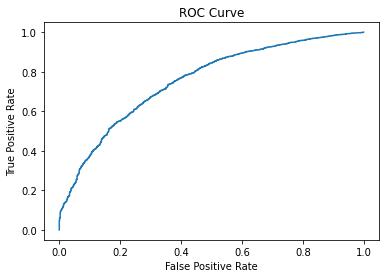

In [64]:
fpr, tpr, thresholds = roc_curve(df2e['abortion'], model3.predict(df2e))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [65]:
print("roc auc score:")
print(roc_auc_score(df2e['abortion'], model3.predict(df2e)))

roc auc score:
0.7537562010064867
